In [91]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import sin, cos, sqrt, atan2, radians
from tqdm import tqdm
from haversine import haversine

In [98]:
### Change the path to the HDF5 with the initial results ###
with h5py.File(r'C:\Users\willd\Documents\Georgia Tech\CSE6424\Project\nearest_nyc.hdf5', 'r') as f:
    nodes_x = f['nodes_x'][:]
    nodes_y = f['nodes_y'][:]
    food_travel_time = f['closest_food_nodes_travel_time'][:]
    physical_travel_time = f['closest_physical_nodes_travel_time'][:]
    transport_travel_time = f['closest_transport_nodes_travel_time'][:]
    education_travel_time = f['closest_education_nodes_travel_time'][:]
    worship_travel_time = f['closest_worship_nodes_travel_time'][:]
    physical_proximity_x = f['closest_physical_nodes_x'][:]
    physical_proximity_y = f['closest_physical_nodes_y'][:]
    transport_proximity_x = f['closest_transport_nodes_x'][:]
    transport_proximity_y = f['closest_transport_nodes_y'][:]
    print(f.keys())
smaller_bounds = (nodes_x > -74.4) & (nodes_x < -73.6) & (nodes_y < 41)
nodes_x = nodes_x[smaller_bounds]
nodes_y = nodes_y[smaller_bounds]
food_travel_time = food_travel_time[smaller_bounds]
physical_travel_time = physical_travel_time[smaller_bounds]
transport_travel_time = transport_travel_time[smaller_bounds]
education_travel_time = education_travel_time[smaller_bounds]
worship_travel_time = worship_travel_time[smaller_bounds]
physical_proximity_x = physical_proximity_x[smaller_bounds]
physical_proximity_y = physical_proximity_y[smaller_bounds]
transport_proximity_x = transport_proximity_x[smaller_bounds]
transport_proximity_y = transport_proximity_y[smaller_bounds]

<KeysViewHDF5 ['closest_education_nodes', 'closest_education_nodes_travel_time', 'closest_education_nodes_x', 'closest_education_nodes_y', 'closest_food_nodes', 'closest_food_nodes_travel_time', 'closest_food_nodes_x', 'closest_food_nodes_y', 'closest_physical_nodes', 'closest_physical_nodes_travel_time', 'closest_physical_nodes_x', 'closest_physical_nodes_y', 'closest_transport_nodes', 'closest_transport_nodes_travel_time', 'closest_transport_nodes_x', 'closest_transport_nodes_y', 'closest_worship_nodes', 'closest_worship_nodes_travel_time', 'closest_worship_nodes_x', 'closest_worship_nodes_y', 'nodes', 'nodes_x', 'nodes_y']>


In [44]:
# Use quantiles to avoid outliers
min_food = np.quantile(food_travel_time, 0.02)
max_food = np.quantile(food_travel_time, 0.98)
min_physical = np.quantile(physical_travel_time, 0.02)
max_physical = np.quantile(physical_travel_time, 0.98)
min_transport = np.quantile(transport_travel_time, 0.02)
max_transport = np.quantile(transport_travel_time, 0.98)
min_education = np.quantile(education_travel_time, 0.02)
max_education = np.quantile(education_travel_time, 0.98)
min_worship = np.quantile(worship_travel_time, 0.02)
max_worship = np.quantile(worship_travel_time, 0.98)

In [45]:
# Basic normalization
def normalize(x, min_, max_):
    return (x - min_)/(max_ - min_)

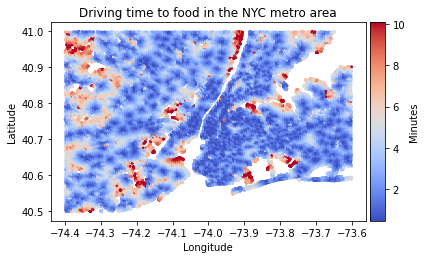

In [46]:
# See https://stackoverflow.com/a/18195921 for figure positioning
# Plot the results
plt.figure()
ax = plt.gca()
ax.scatter(nodes_x, nodes_y, c=[cm.coolwarm(normalize(x, min_food, max_food)) for x in food_travel_time], s=3)
ax.set_title('Driving time to food in the NYC metro area')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cmap = cm.coolwarm
norm = colors.Normalize(vmin=min_food/60, vmax=max_food/60)
cb1 = colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical', label='Minutes')
### Change output path ###
plt.savefig(r'C:\Users\willd\Documents\Georgia Tech\CSE6424\Project\food_travel_time.png', dpi=300)

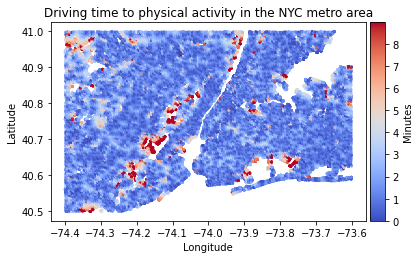

In [48]:
plt.figure()
ax = plt.gca()
ax.scatter(nodes_x, nodes_y, c=[cm.coolwarm(normalize(x, min_physical, max_physical)) for x in physical_travel_time], s=3)
ax.set_title('Driving time to physical activity in the NYC metro area')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cmap = cm.coolwarm
norm = colors.Normalize(vmin=min_physical/60, vmax=max_physical/60)
cb1 = colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical', label='Minutes')
### Change output path ###
plt.savefig(r'C:\Users\willd\Documents\Georgia Tech\CSE6424\Project\physical_travel_time.png', dpi=300)

In [92]:
def haversine_wrapper(lat1, lon1, lat2, lon2):
    return haversine((lat1, lon1), (lat2, lon2))

In [99]:
# Calculate distance (this iteration didn't have them originally)
physical_dist = np.zeros_like(nodes_x)
transport_dist = np.zeros_like(nodes_x)
for i in tqdm(range(len(nodes_x))):
    physical_dist[i] = haversine_wrapper(nodes_y[i], nodes_x[i], physical_proximity_y[i], physical_proximity_x[i])
    transport_dist[i] = haversine_wrapper(nodes_y[i], nodes_x[i], transport_proximity_y[i], transport_proximity_x[i])

100%|████████████████████████████████████████████████████████████████████████| 32109/32109 [00:00<00:00, 118917.51it/s]


In [100]:
min_physical_dist = np.quantile(physical_dist, 0.02)
max_physical_dist = np.quantile(physical_dist, 0.98)
min_transport_dist = np.quantile(transport_dist, 0.02)
max_transport_dist = np.quantile(transport_dist, 0.98)

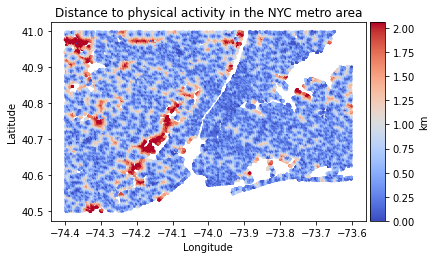

In [97]:
plt.figure()
ax = plt.gca()
ax.scatter(nodes_x, nodes_y, c=[cm.coolwarm(normalize(x, min_physical_dist, max_physical_dist)) for x in physical_dist], s=3)
ax.set_title('Distance to physical activity in the NYC metro area')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cmap = cm.coolwarm
norm = colors.Normalize(vmin=min_physical_dist, vmax=max_physical_dist)
cb1 = colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical', label='km')
### Change output path ###
plt.savefig(r'C:\Users\willd\Documents\Georgia Tech\CSE6424\Project\physical_distance.png', dpi=300)

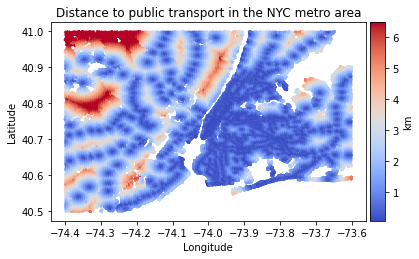

In [104]:
plt.figure()
ax = plt.gca()
ax.scatter(nodes_x, nodes_y, c=[cm.coolwarm(normalize(x, min_transport_dist, max_transport_dist)) for x in transport_dist], s=3)
ax.set_title('Distance to public transport in the NYC metro area')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cmap = cm.coolwarm
norm = colors.Normalize(vmin=min_transport_dist, vmax=max_transport_dist)
cb1 = colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical', label='km')
### Change output path ###
plt.savefig(r'C:\Users\willd\Documents\Georgia Tech\CSE6424\Project\transport_distance.png', dpi=300)

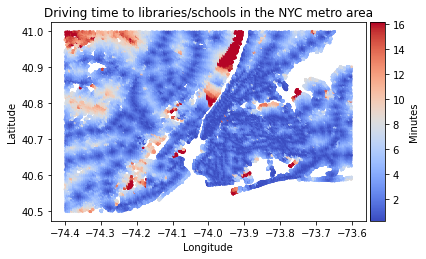

In [105]:
plt.figure()
ax = plt.gca()
ax.scatter(nodes_x, nodes_y, c=[cm.coolwarm(normalize(x, min_education, max_education)) for x in education_travel_time], s=3)
ax.set_title('Driving time to libraries/schools in the NYC metro area')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cmap = cm.coolwarm
norm = colors.Normalize(vmin=min_education/60, vmax=max_education/60)
cb1 = colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical', label='Minutes')
### Change output path ###
plt.savefig(r'C:\Users\willd\Documents\Georgia Tech\CSE6424\Project\education_travel_time.png', dpi=300)

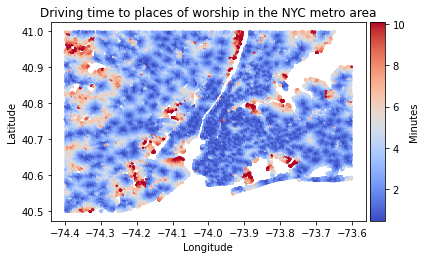

In [107]:
plt.figure()
ax = plt.gca()
ax.scatter(nodes_x, nodes_y, c=[cm.coolwarm(normalize(x, min_worship, max_worship)) for x in worship_travel_time], s=3)
ax.set_title('Driving time to places of worship in the NYC metro area')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cmap = cm.coolwarm
norm = colors.Normalize(vmin=min_worship/60, vmax=max_worship/60)
cb1 = colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical', label='Minutes')
### Change output path ###
plt.savefig(r'C:\Users\willd\Documents\Georgia Tech\CSE6424\Project\worship_travel_time.png', dpi=300)